In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


In [ ]:
print(x_train.shape[0])
print(x_test.shape[0])

50000
10000


In [ ]:
#first column is related to red ,  second-green , third-blue
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [ ]:
x_train,x_test = x_train/255.0,x_test/255.0

In [ ]:
print(x_train[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


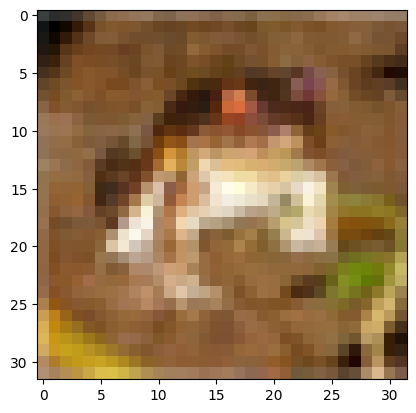

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [ ]:
arr=y_train[0]
print(arr)

[6]


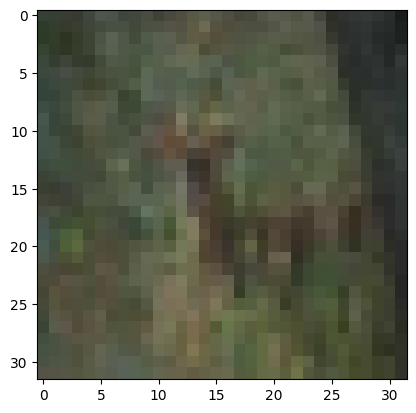

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10])
plt.show()

In [ ]:
arr=y_train[10]
print(arr)

[4]


In [ ]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

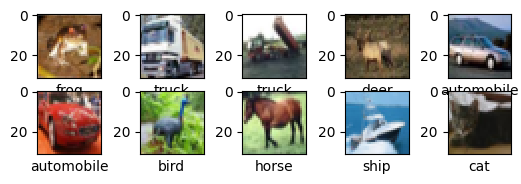

In [ ]:
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i][0]])

In [ ]:
from tensorflow.keras import utils
y_train = utils.to_categorical(y_train,10)
y_test = utils.to_categorical(y_test,10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
model = Sequential(
    [
        Dense(64,input_shape=(32,32,3)),
        Conv2D(64,kernel_size=(3,3),activation='relu'),
        Conv2D(64,kernel_size=(3,3),activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(128,kernel_size=(3,3),activation='relu'),
        Conv2D(64,kernel_size=(3,3),activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.5),
        Flatten(),
        Dense(128,activation='relu'),
        Dense(10,activation='softmax'),

    ]
)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
train=model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
 357/1563 [=====>........................] - ETA: 7:40 - loss: 1.9556 - accuracy: 0.2769

In [ ]:
model.summary()